In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)

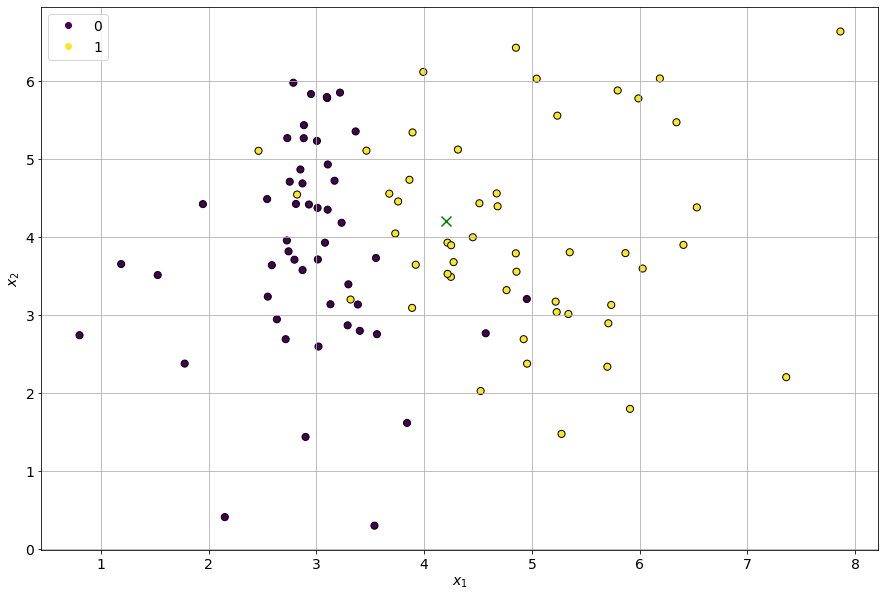

In [2]:
# Генерация случайных данных

from sklearn.datasets import make_classification

X_data, y_data = make_classification(
    n_samples=100,
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    n_clusters_per_class=2,
    random_state=RANDOM_STATE,
    shift=[4, 4]
)

X_new = np.array([[4.2, 4.2]])

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', s=100, edgecolor='k', c='green')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [3]:
print(X_data.shape)
print('')
print(y_data.shape)

(100, 2)

(100,)


In [4]:
X_data[:3]

array([[3.23394531, 4.18332468],
       [3.07961675, 3.9276832 ],
       [3.01341491, 3.71308   ]])

In [5]:
y_data[:3]

array([0, 0, 0])

In [6]:
# Проверим уникальные значения
np.unique(y_data)

array([0, 1])

In [7]:
# отображение функции сигмоиды
def sigmoid(z):
    sgm = 1/(1+np.exp(-z))
    return sgm

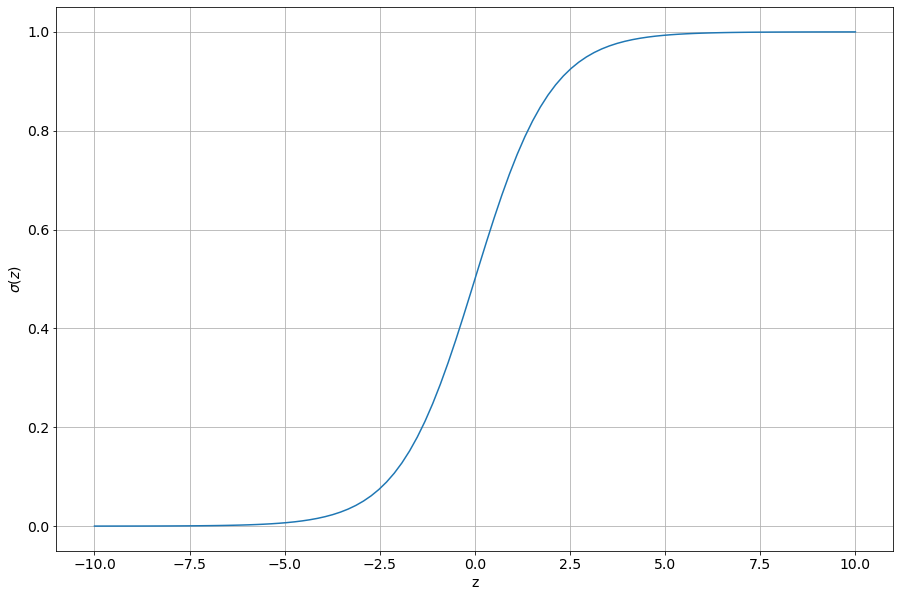

In [8]:
# построение графика
X = np.linspace(-10, 10, 100)
Y = sigmoid(X)

plt.plot(X, Y)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.grid()

In [9]:
# TODO - функция предсказания линейной части
def predict_linreg(X, W):
    X=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    z=X@W
    return z

In [10]:
# Проверим на паре тестов
W = np.array([1, 2, 3])
X = np.array([
    [3, 4],
    [2, 3],
    [0, 1]
])
y_true = np.array([19, 14, 4])
y_pred = predict_linreg(X, W)

assert np.all(y_true == y_pred)

In [11]:
# TODO - функция предсказания степени уверенности
# NOTE - proba ~ probability
def predict_proba(X, W):
    z=predict_linreg(X, W)
    y=sigmoid(z)
    return y

In [12]:
# Проверим на паре тестов
W = np.array([1, 2, 3])
X = np.array([
    [-3, 4],
    [2, -3],
    [0, -1]
])
y_true = np.array([0.999088, 0.01798, 0.1192])
y_pred = predict_proba(X, W)

# Проверка сделана через близость значений из-за округлений
assert np.all(np.abs(y_true-y_pred) < 1e-5)

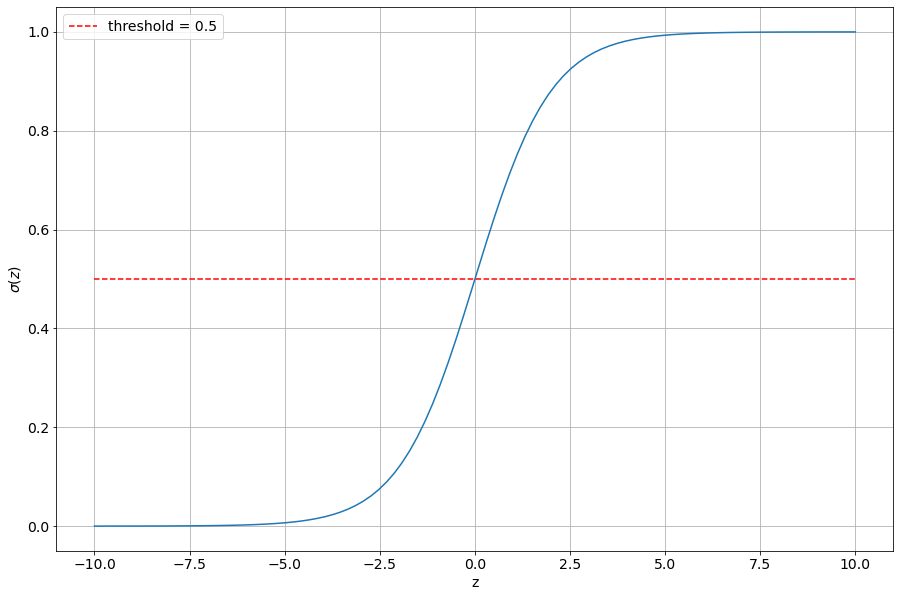

In [13]:
# Для примера отобразим порог вместе с функцией сигмоиды

X = np.linspace(-10, 10, 100)
Y = sigmoid(X)
Y_thrsh = np.full_like(X, 0.5)

plt.plot(X, Y)
plt.plot(X, Y_thrsh, 'r--', label='threshold = 0.5')
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.legend()
plt.grid()

In [14]:
# TODO - функция конечного предсказания
#         результат должен содержать присвоенный класс
def predict(X, W, threshold):
    y=predict_proba(X,W)
    y_cls=y;
    th=np.array([threshold]*len(y))
    for i in range(len(y)):
        if y[i]>th[i]:
            y_cls[i]=1
        else:
            y_cls[i]=0
    return y_cls

In [15]:
# Проверим на паре тестов
W = np.array([1, 2, 3])
X = np.array([
    [-3, 4],
    [2, -3],
    [0, -1]
])
y_true = np.array([1, 0, 0])
y_pred = predict(X, W, 0.5)
print(y_pred)
assert np.all(y_true == y_pred)

[1. 0. 0.]


In [16]:
# визуализация предсказаний

def plot_2d_decision_boundary(X, W, y_true):
    x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
    x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
    xx, yy = np.meshgrid(x1_vals, x2_vals)

    y_pred = predict_proba(np.c_[xx.ravel(), yy.ravel()], W)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])
    plt.show()
    

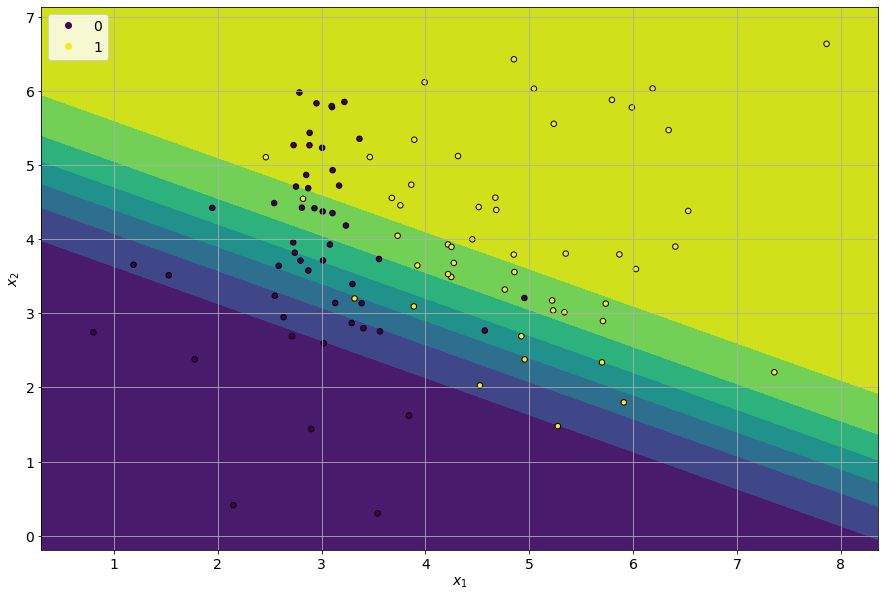

In [17]:
rand_W = [-10, 1, 2]
X = X_data
y_true = y_data

plot_2d_decision_boundary(X_data, rand_W, y_data)


In [18]:
# Замените функцию predict_proba() на predict()
def plot_2d_decision_boundary_new(X, W, y_true):
    x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
    x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
    xx, yy = np.meshgrid(x1_vals, x2_vals)

    y_pred = predict(np.c_[xx.ravel(), yy.ravel()], W,0.5)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])
    plt.show()


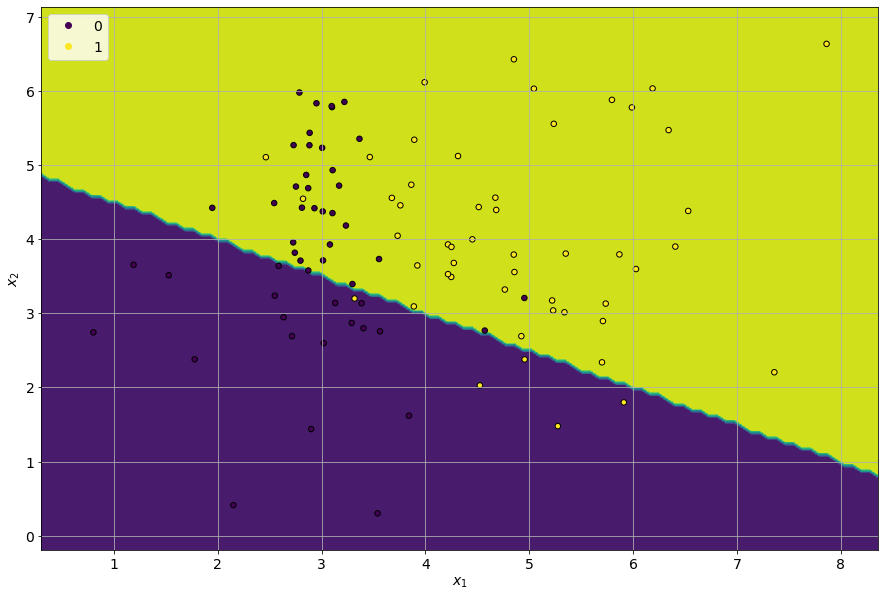

In [19]:
rand_W = [-10, 1, 2]
X = X_data
y_true = y_data

plot_2d_decision_boundary_new(X_data, rand_W, y_data)

Если мы заменим функцию predict_proba() на predict (), То заметим что данные разделились четко на подходящие и не подходящие, это связано с тем, что мы самостоятельно задали необходимую величину степени уверенности.

In [20]:
# TODO - реализуйте функцию получения показателей
def get_truefalse_metrics(y_true, y_pred):
    TP=np.sum((y_true==1)&(y_pred==1))
    TN=np.sum((y_true==0)&(y_pred==0))
    FP=np.sum((y_true==0)&(y_pred==1))
    FN=np.sum((y_true==1)&(y_pred==0))
    return TP, TN, FP, FN

In [21]:
# Небольшой тест
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
assert np.all([TP == 3, TN == 4, FP == 2, FN == 5])

In [22]:
# TODO - постройте матрицу ошибок в виде 2D квадратного массива
def get_confusion_matrix(y_true, y_pred):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    conf_matrix=np.array([[TN,FP], [FN,TP]])
    return conf_matrix

In [23]:
# Небольшой тест
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

conf_matrix = get_confusion_matrix(y_true, y_pred)
assert np.all(conf_matrix == np.array([[4, 2], [5, 3]]))

In [24]:
#отображение с помощью пакета seaborn

def show_confusion_matrix(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Предсказанное')
    plt.ylabel('Истинное')
    plt.show()

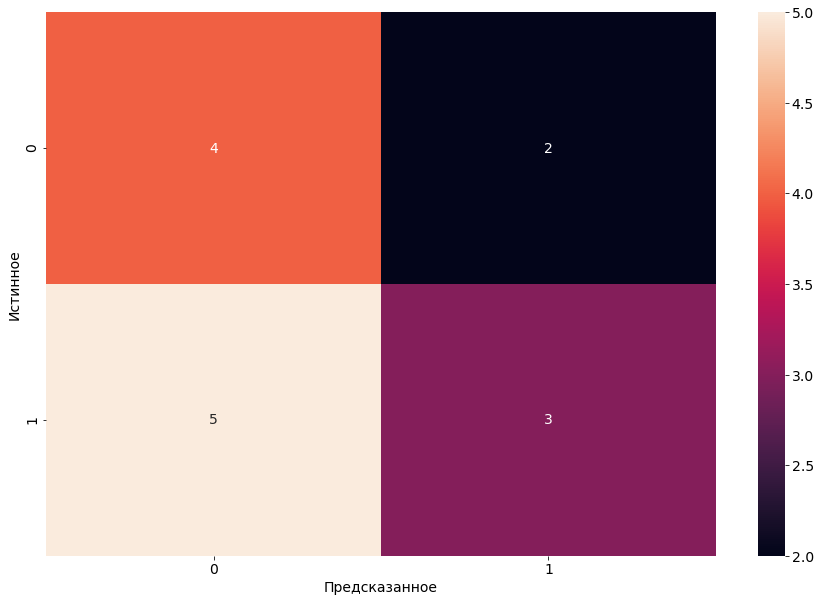

In [25]:
show_confusion_matrix(conf_matrix)

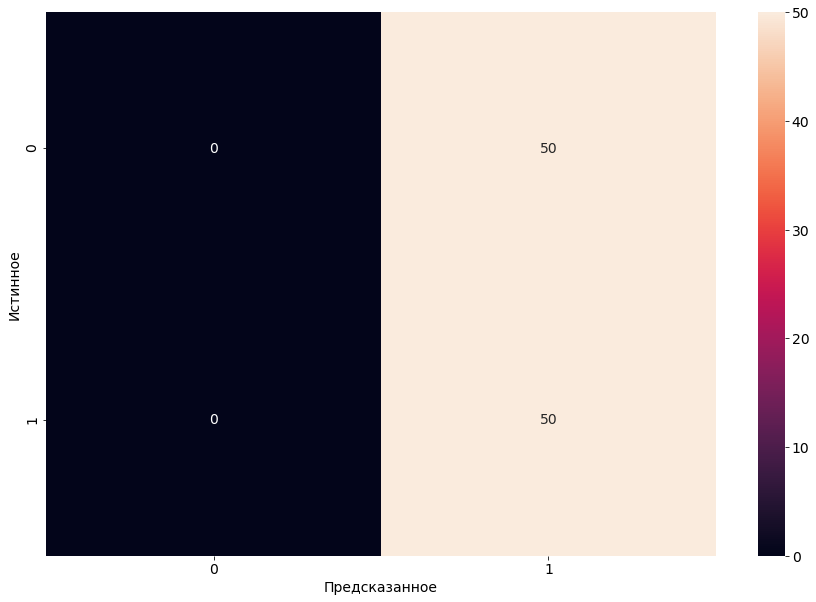

In [26]:
# TODO - используйте rand_W для предсказания
rand_W = [-10, 1, 2]
X = X_data
y_true = y_data
y_pred = predict(X, W, 0.5)
conf_matrix = get_confusion_matrix(y_true, y_pred)
show_confusion_matrix(conf_matrix)

In [27]:
# вычисление метрик
def calculate_accuracy(y_true, y_pred):
    # TODO - функция вычисления точности
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    acc=(TP+TN)/(TP+TN+FP+FN)
    return acc

def calculate_recall_precision_f1(y_true, y_pred, class_index):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    '''
    class_index - Индекс класса для которого делается оценка показателей
    '''
    # TODO - функция вычисления показателей recall, precision
    if (class_index==1):
        recall=TP/(TP+FN)
        precision=TP/(TP+FP)
    else:
        recall=TN/(TN+FP)
        precision=TN/(TN+FN)    
    f1=2*recall*precision/(precision+recall)
    
    return recall, precision, f1

In [28]:
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

acc = calculate_accuracy(y_true, y_pred)
recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_true, y_pred, 1)
recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_true, y_pred, 0)

print(f'Class 1 metrics: {recall_1, precision_1, f1_1}')
print(f'Class 0 metrics: {recall_0, precision_0, f1_0}')
print(f'Accuracy: {acc}')

assert np.all([acc == 0.5, recall_1 == 0.375, precision_1 == 0.6])

Class 1 metrics: (0.375, 0.6, 0.4615384615384615)
Class 0 metrics: (0.6666666666666666, 0.4444444444444444, 0.5333333333333333)
Accuracy: 0.5


In [29]:
def show_classification_metrics(y_true, y_pred):
    acc = calculate_accuracy(y_true, y_pred)
    recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_true, y_pred, 1)
    recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_true, y_pred, 0)

    print(f'Class 1 metrics: {recall_1, precision_1, f1_1}')
    print(f'Class 0 metrics: {recall_0, precision_0, f1_0}')
    print(f'Accuracy: {acc}')

In [30]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

show_classification_metrics(y_true, y_pred)

Class 1 metrics: (1.0, 0.7, 0.8235294117647058)
Class 0 metrics: (0.5714285714285714, 1.0, 0.7272727272727273)
Accuracy: 0.7857142857142857


In [31]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

show_classification_metrics(y_true, y_pred)

Class 1 metrics: (0.42857142857142855, 1.0, 0.6)
Class 0 metrics: (1.0, 0.6363636363636364, 0.7777777777777778)
Accuracy: 0.7142857142857143


In [32]:
# TODO - функция сплита со стратификацией
def train_test_split_stratified(X, y, test_size):
    # Объединим X и y, чтобы работать с одним массивом
    new_mas=np.concatenate((X,y.reshape(len(y),1)),axis=1)
    # Создадим листы Xy_train и Xy_test, в которые будем формировать выборки
    Xy_train=list()
    Xy_test=list()
    # Создаем цикл по уникальным значениям (классам) массива y
    #   (так как стратифицируем по целевым классам)
    new_mas=np.random.permutation(new_mas)
    # уникальные значения из последнего столбца (который присоединили)
    u=np.unique(new_mas[:,new_mas.shape[1]-1])
    # Цикл по количеству уникальных элементов
    for i in range(len(u)):

        # Получаем индексы записей, у которых значение равно уникальному
        #   значению в итерации (равно выбранному классу в итерации)
        # numpy.where()
        cond=np.where(new_mas[:,new_mas.shape[1]-1]==u[i],True,False)
        
        # создаем массив индексов
        index=np.array(range(len(y)))
        
        # выбираем соответсвующие индексы для данной итерации
        index=index[cond]
        
        # Перемешиваем индексы, чтобы выборка была случайной
        # numpy.random.permutation()
        index=np.random.permutation(index)
        
        # Умножаем test_size на количество записей класса,
        #   чтобы получить количество записе этого класса, которое 
        #   уходит на тест
        # Не забудьте, что количество должно быть int
        cls_n_test=int((len(index))*test_size)


        # Выбираем индексы записей, которые пойдут на тест [:cls_n_test]
        # Остальные индексы пойдут на обучение
        index_test=index[:cls_n_test]
        index_train=index[cls_n_test:]

        # Расширяем массив Xy_train данными по индексам для обучения
        # Расширяем массив Xy_test данными по индексам для теста
        # list.extend()
        Xy_train.extend(new_mas[index_train])
        Xy_test.extend(new_mas[index_test])

    # Перемешаем еще раз полученные Xy_train и Xy_test
    # numpy.random.permutation()
    Xy_test=np.random.permutation(Xy_test)
    Xy_train=np.random.permutation(Xy_train)                      

    # Разделим обратно на X_train, X_test, y_train, y_test
    # X - все колонки до последней, y - последняя колонка                   
    X_test=Xy_test[:,:X.shape[1]]
    X_train=Xy_train[:,:X.shape[1]]
    y_test=Xy_test[:,X.shape[1]]
    y_train=Xy_train[:,X.shape[1]]
    
    return X_train, X_test, y_train, y_test

In [33]:
TEST_SIZE = 0.3

X_train, X_test, y_train, y_test = train_test_split_stratified(X_data, y_data, TEST_SIZE)

assert np.all([X_train.shape[0] == 70, X_test.shape[1] == X_data.shape[1], y_test.shape[0] == 30])

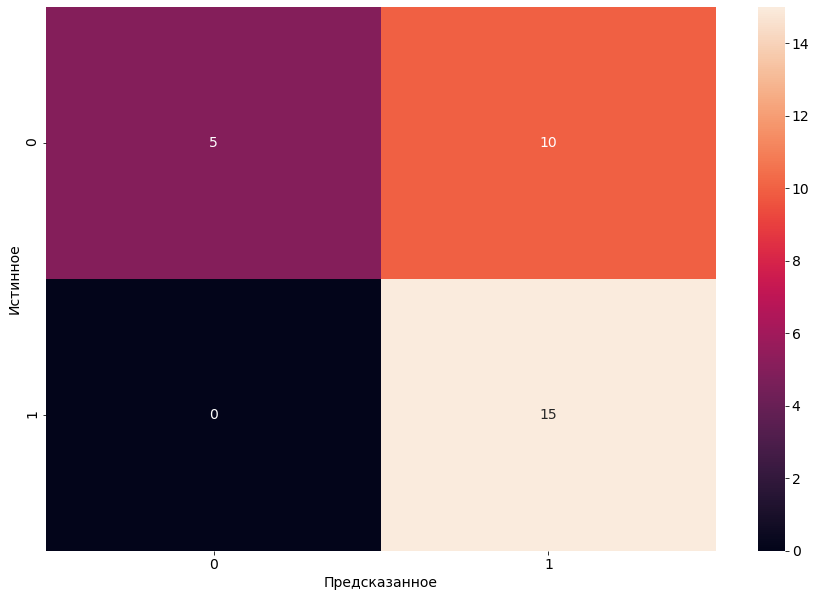

Class 1 metrics: (1.0, 0.6, 0.7499999999999999)
Class 0 metrics: (0.3333333333333333, 1.0, 0.5)
Accuracy: 0.6666666666666666


In [34]:
# TODO - выполните предсказание с порогом 0.5 и отобразите метрики
X=X_test
W=rand_W
y_true=y_test
y_pred = predict(X, W,0.5)
conf_matrix = get_confusion_matrix(y_true, y_pred)
show_confusion_matrix(conf_matrix)
show_classification_metrics(y_true, y_pred)

<ipython-input-35-c6b2bc2bf459>:3: RuntimeWarning: divide by zero encountered in log
  J_1 = -np.log(Y)
<ipython-input-35-c6b2bc2bf459>:4: RuntimeWarning: divide by zero encountered in log
  J_2 = -np.log(1-Y)


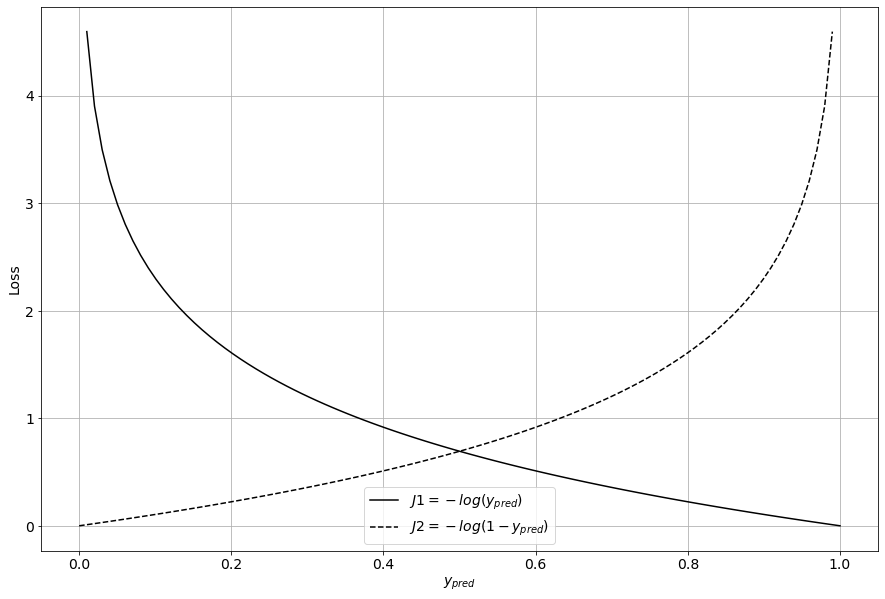

In [35]:
# График функции потерь
Y = np.linspace(0, 1, 100)
J_1 = -np.log(Y)
J_2 = -np.log(1-Y)

plt.plot(Y, J_1, 'k', Y, J_2, 'k--')
plt.grid()
plt.xlabel('$y_{pred}$')
plt.ylabel('Loss')
plt.legend(['$J1=-log(y_{pred})$', '$J2=-log(1-y_{pred})$'])

In [36]:
def bce_loss(y_true, y_pred):
    # TODO - функция потерь
    J1=-np.log(y_pred)
    J2=-np.log(1-y_pred)
    J=y_true*J1+(1-y_true)*J2
    loss=np.mean(J)
    return loss

def bce_loss_deriv(X, y_true, y_pred):
    # TODO - производная функции потерь
    dJ=np.mean(np.transpose(X)*(y_pred-y_true),axis=1)
    return dJ

In [37]:
# Проверка
y_true = np.array([0, 0, 1, 1])
y_pred = np.array([0.98, 0.3333, 0.2, 0.8])

X = np.array([
    [1, 2, 3],
    [2, 3, 4],
    [8, 9, 0],
    [7, 6, 5],
])

loss = bce_loss(y_true, y_pred)
dJ = bce_loss_deriv(X, y_true, y_pred)
print(dJ)
dJ_true = np.array([-1.53835, -1.360025, 0.8183]) 

assert loss == 1.5375048946336445
assert np.all(np.abs(dJ-dJ_true) < 1e-8)

[-1.53835  -1.360025  0.8183  ]


In [38]:
# Обучение модели

def fit_model(X, y, lr, n_iter):
    # TODO - функция обучения модели
    W = np.zeros(X.shape[1]+1)
    loss_history = []
    y_pred = predict_proba(X,W)
    X1=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    for i in range(n_iter):
        dJ=bce_loss_deriv(X1, y, y_pred)
        W=W-lr*dJ
        y_pred = predict_proba(X,W)
        loss = bce_loss(y, y_pred)
        loss_history.append(loss)
    print(f'Result weights: {W}')
    return W, loss_history

def show_loss(loss_history):
    # TODO - функция отображения истории обучения
    plt.plot(loss_history)
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('$J(X)$')
    plt.grid()
    plt.show()
    

Result weights: [-8.45819945  2.24692463  0.05918624]


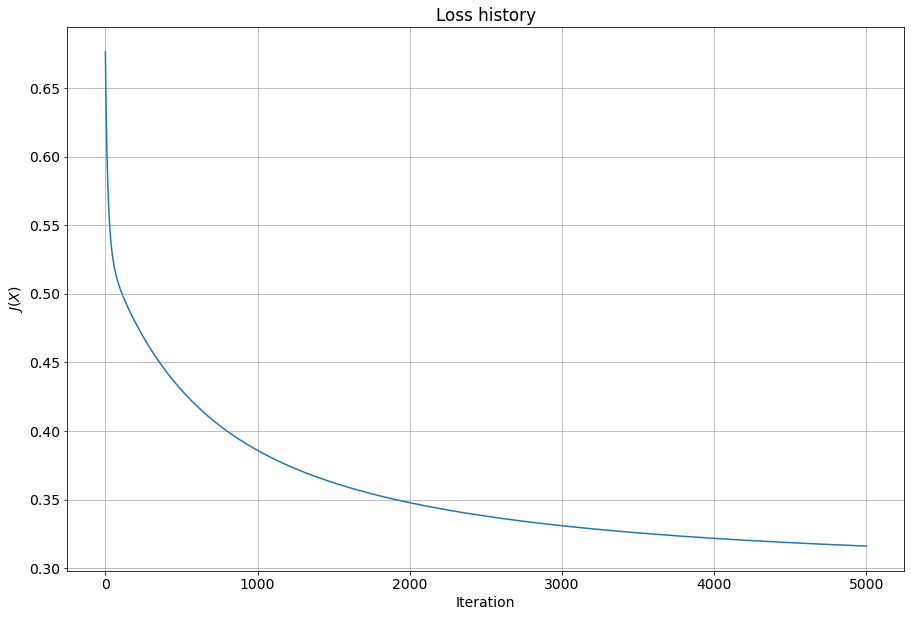

In [39]:
trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train
)

show_loss(loss_history)

In [40]:
# TODO - Отобразите значения метрик
y_pred = predict(X_train,trained_W,0.5)
y_true=y_train
show_classification_metrics(y_true, y_pred)

Class 1 metrics: (0.9142857142857143, 0.9411764705882353, 0.9275362318840579)
Class 0 metrics: (0.9428571428571428, 0.9166666666666666, 0.9295774647887323)
Accuracy: 0.9285714285714286


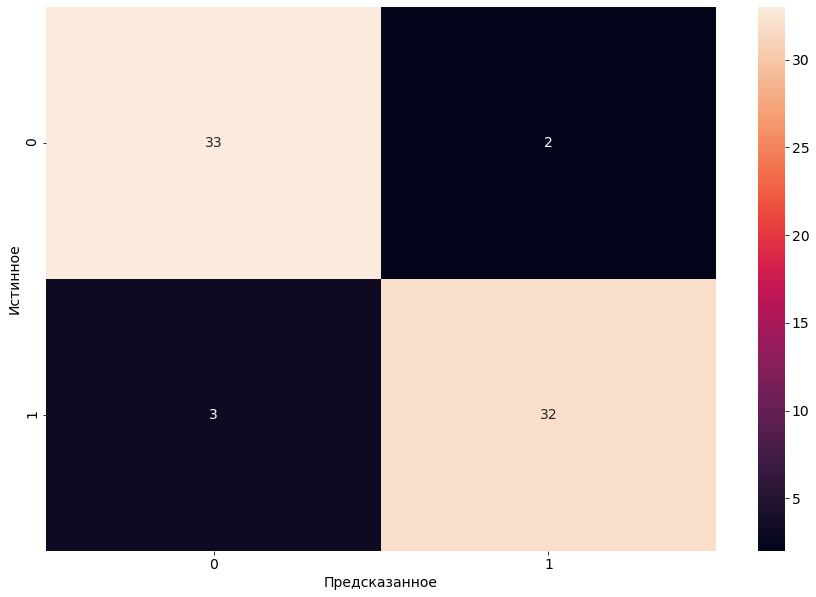

In [41]:
# TODO - Отобразите матрицу ошибок
conf_matrix = get_confusion_matrix(y_train, y_pred)
show_confusion_matrix(conf_matrix)

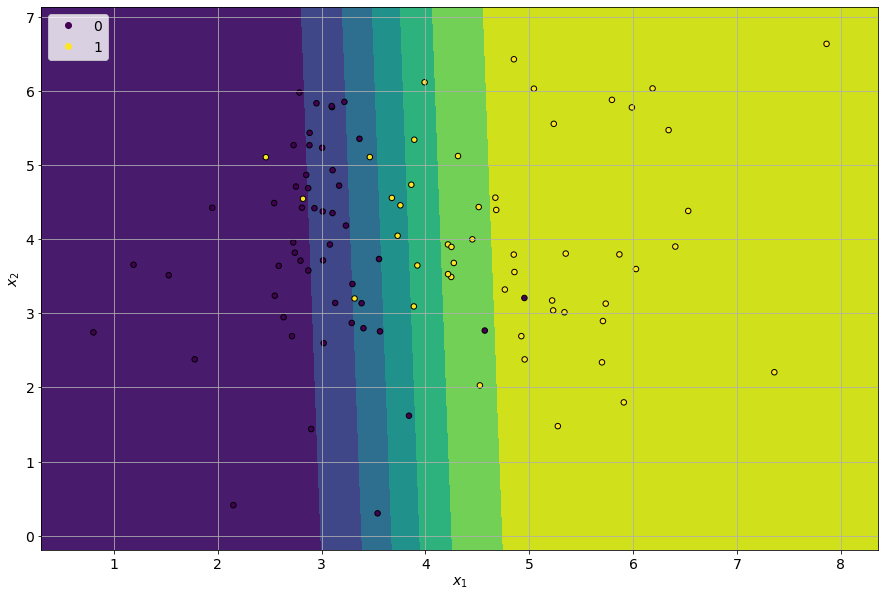

In [42]:
plot_2d_decision_boundary(X_data, trained_W, y_data)

Class 1 metrics: (0.9714285714285714, 0.5573770491803278, 0.7083333333333333)
Class 0 metrics: (0.22857142857142856, 0.8888888888888888, 0.3636363636363636)
Accuracy: 0.6


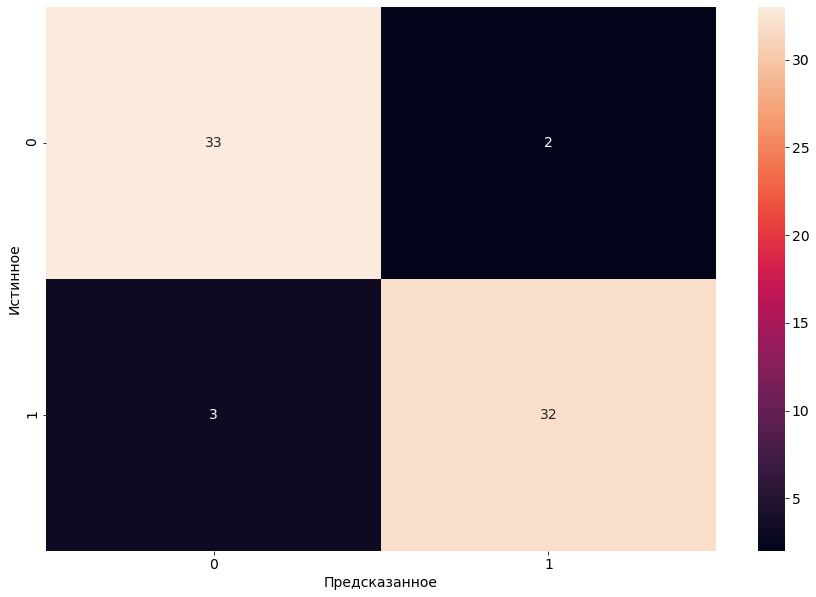

Class 1 metrics: (0.9428571428571428, 0.7674418604651163, 0.8461538461538461)
Class 0 metrics: (0.7142857142857143, 0.9259259259259259, 0.8064516129032259)
Accuracy: 0.8285714285714286


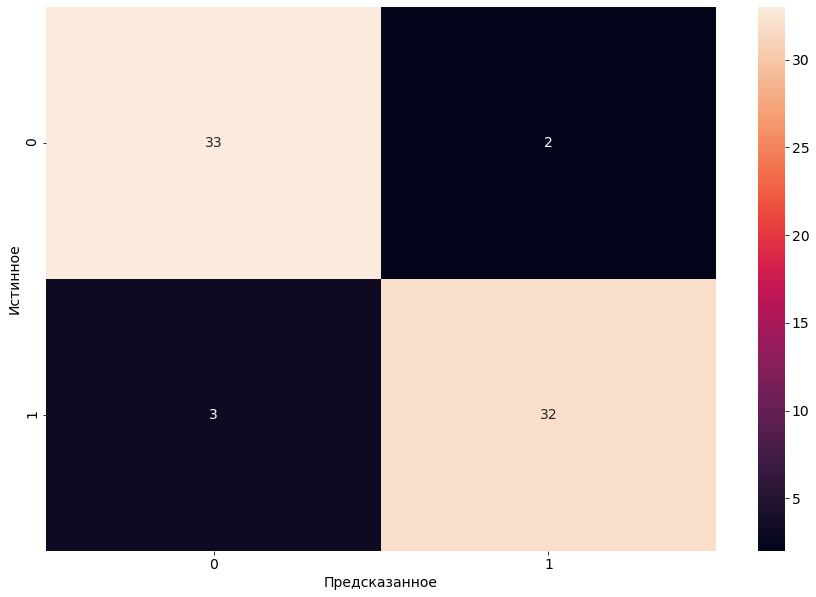

Class 1 metrics: (0.9142857142857143, 0.8888888888888888, 0.9014084507042254)
Class 0 metrics: (0.8857142857142857, 0.9117647058823529, 0.8985507246376812)
Accuracy: 0.9


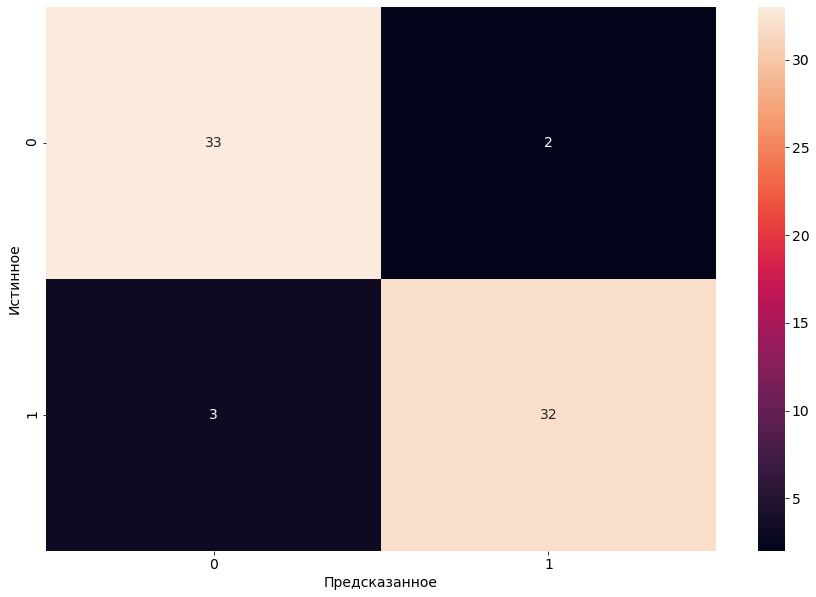

Class 1 metrics: (0.8857142857142857, 0.9393939393939394, 0.9117647058823529)
Class 0 metrics: (0.9428571428571428, 0.8918918918918919, 0.9166666666666667)
Accuracy: 0.9142857142857143


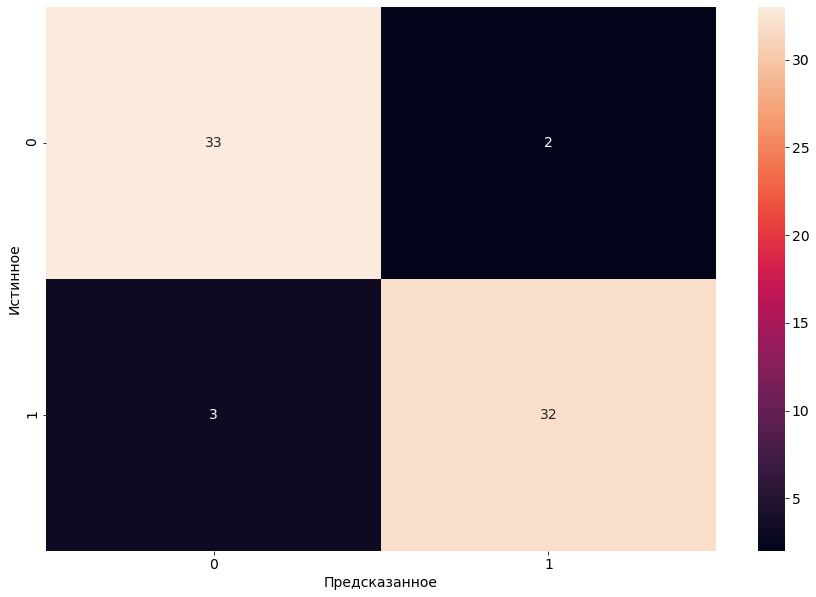

Class 1 metrics: (0.7428571428571429, 0.9629629629629629, 0.8387096774193549)
Class 0 metrics: (0.9714285714285714, 0.7906976744186046, 0.8717948717948717)
Accuracy: 0.8571428571428571


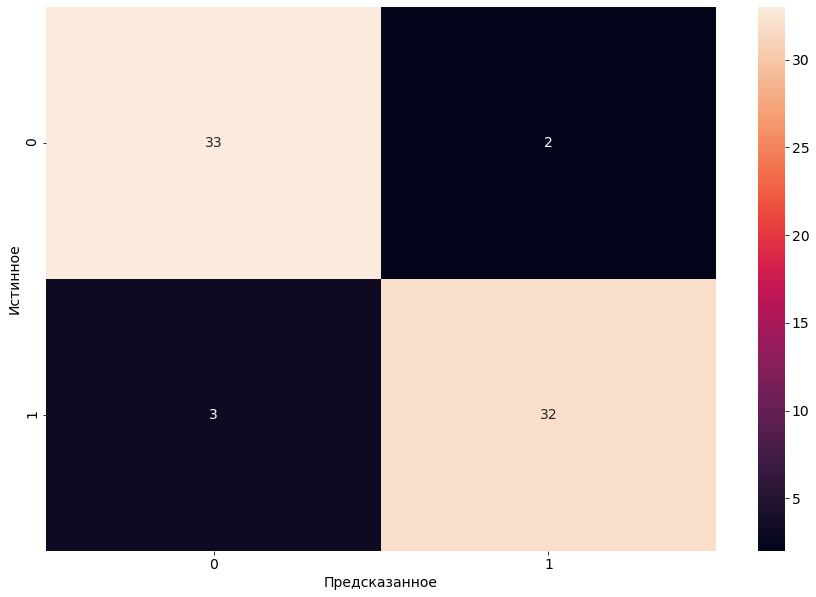

Class 1 metrics: (0.6, 0.9545454545454546, 0.7368421052631579)
Class 0 metrics: (0.9714285714285714, 0.7083333333333334, 0.8192771084337349)
Accuracy: 0.7857142857142857


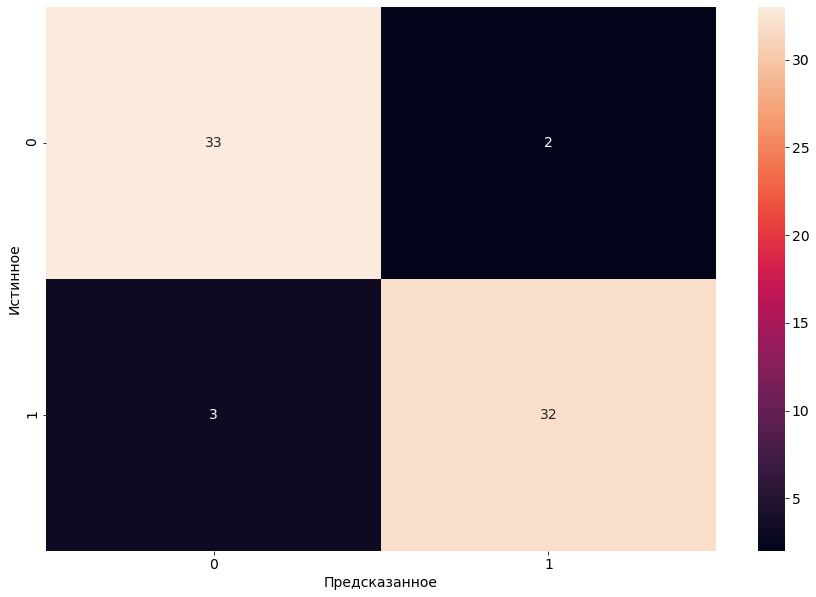

Class 1 metrics: (0.4, 1.0, 0.5714285714285715)
Class 0 metrics: (1.0, 0.625, 0.7692307692307693)
Accuracy: 0.7


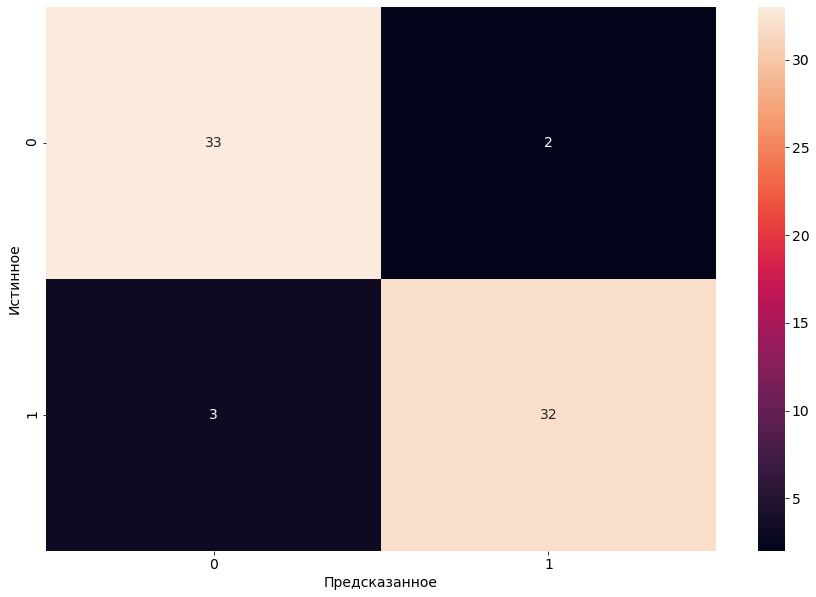

In [43]:
# Изучите, как меняются показатели в зависимости от выбранного порога (7 разных значений в диапазоне $[0.1; 0.95]$.

mass=np.linspace(0.1, 0.95, 7)
y_true=y_train
for i in mass:
    y_pred = predict(X_train,trained_W,i)
    show_classification_metrics(y_true, y_pred)
    show_confusion_matrix(conf_matrix)

In [44]:
# TODO - напишите функции получения TRP и FPR

def get_tpr_fpr_metrics(y_true, y_pred, class_index):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    if(class_index==1):
        TPR=TP/(TP+FN)
        FPR=FP/(TN+FP)
    else:
        TPR=TN/(TN+FP)
        FPR=FN/(TP+FN)
    return TPR, FPR

In [45]:
# TEST
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

tpr_0, fpr_0 = get_tpr_fpr_metrics(y_true, y_pred, 0)

assert np.isclose(tpr_0, 0.5)
assert np.isclose(fpr_0, 0.5)

In [46]:
# прогонка по 11 значениям порога

def show_roc_curve(X, y, W, class_index):
    diag_values = np.array([
        [0, 0],
        [1, 1],
    ])

    render_n_points = 10
    threshold_values = np.arange(render_n_points+1)/render_n_points
    tpr_values = []
    fpr_values = []

    for threshold_value in threshold_values:
        y_pred = predict(X, W, threshold=threshold_value)
        tpr_0, fpr_0 = get_tpr_fpr_metrics(y, y_pred, class_index)

        tpr_values.append(tpr_0)
        fpr_values.append(fpr_0)

    plt.plot(fpr_values, tpr_values)
    plt.plot(diag_values[:,0], diag_values[:,1], 'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)

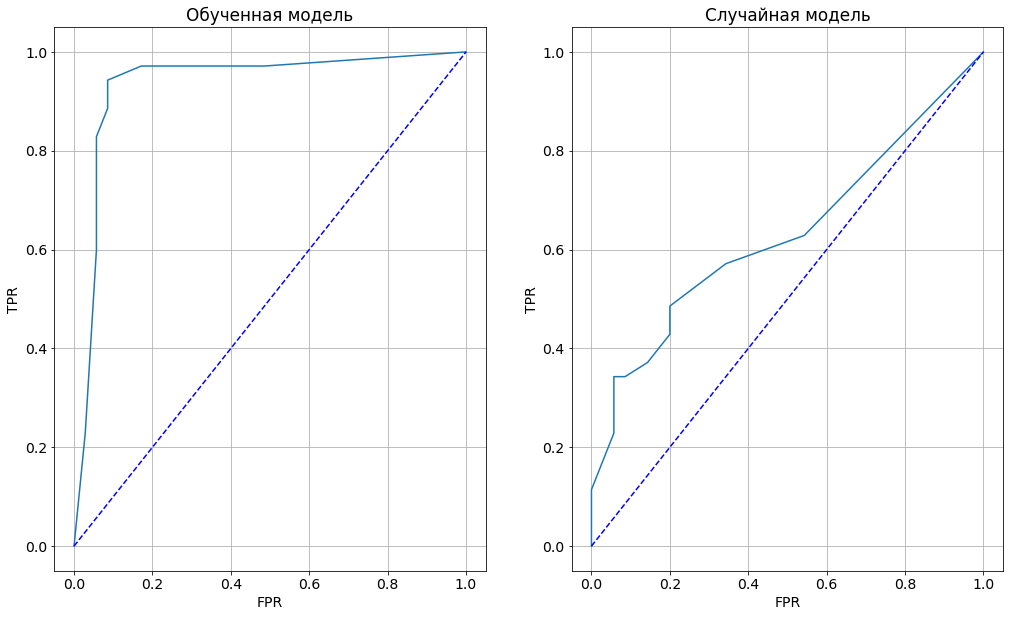

In [47]:
plt.figure(figsize=[17,10])
plt.subplot(121)
show_roc_curve(X_train, y_train, trained_W, class_index=0)
plt.title('Обученная модель')
plt.subplot(122)
show_roc_curve(X_train, y_train, rand_W, class_index=0)
plt.title('Случайная модель')
plt.show()

In [48]:
## TODO - реализуйте и отобразите PR-кривые двух моделей

def show_pr_curve(X, y, W, class_index):
    diag_values = np.array([
        [0, 0],
        [1, 1],
    ])

    render_n_points=10
    threshold_values=np.arange(render_n_points+1)/render_n_points
    precision_values=[]
    recall_values=[]
    y_true=y
    
    for threshold_value in threshold_values:
        y_pred = predict(X, W, threshold=threshold_value)
        recall, precision, f1=calculate_recall_precision_f1(y_true, y_pred, class_index)
        precision_values.append(precision)
        recall_values.append(recall)

    plt.plot(recall_values, precision_values)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.grid(True)


<ipython-input-27-c70b3b9a6489>:19: RuntimeWarning: invalid value encountered in long_scalars
  precision=TN/(TN+FN)


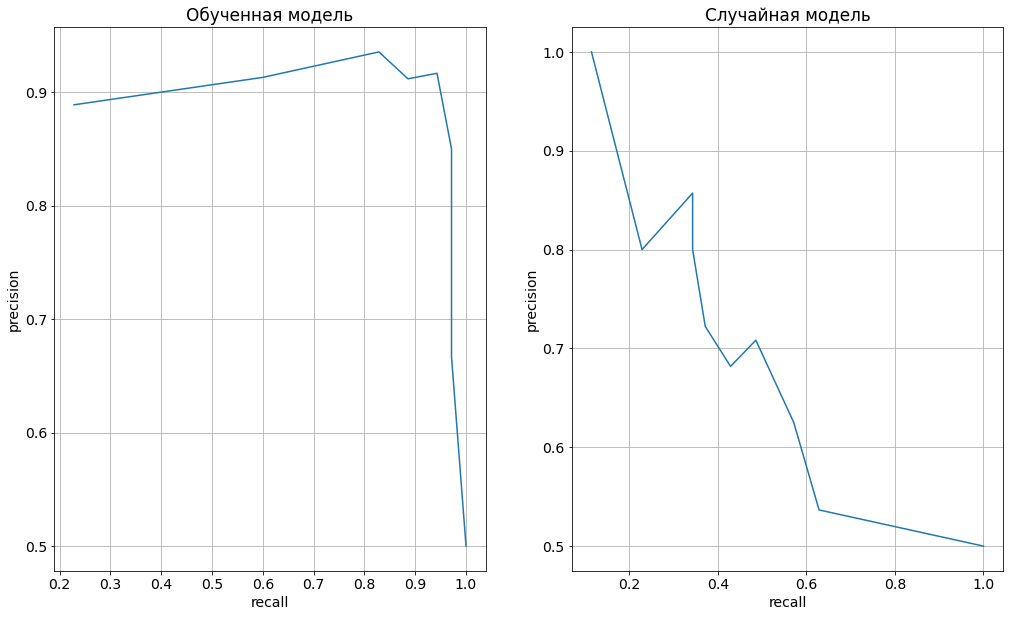

In [49]:
plt.figure(figsize=[17,10])
plt.subplot(121)
show_pr_curve(X_train, y_train, trained_W, class_index=0)
plt.title('Обученная модель')
plt.subplot(122)
show_pr_curve(X_train, y_train, rand_W, class_index=0)
plt.title('Случайная модель')
plt.show()

In [50]:
# TODO - напишите реализацию K-fold разделения
def get_kfold_splits(n_samples, kfolds):
    ''' Функция получения индексов для разделения на K фолдов
    
    Параметры
    ---------
    n_samples: int
        Количество записей в данных
    k: int
        Количество фолдов
    
    Возвращает
    ----------
    Список, в котором находится k пар (кортежей)
        Каждая пара представляет собой два массива:
        - массив индексов обучающей выборки
        - массив индексов тестовой выборки
    '''
    folds_indexes = []
    # Создайте список перемешанных индексов записей
    #   numpy.random.permutation(range(n_samples))
    index=np.random.permutation(range(n_samples))
    # Получите размер фолда
    #   n_samples/kfolds
    step=n_samples/kfolds
    for i in range(kfolds):
        # Получите индекс начала тестового фолда
        # Получите индекс конца тестового фолда
        #   start_idx = int(i*step)
        start_idx=int(i*step)
        end_idx=int(i*step+step)
        # Создайте массив нулей с типом bool
        # Это будет маска для выбора индексов обучения/теста
        mask=np.zeros([n_samples], dtype=bool)

        # По диапазону индексов тестового фолда запишите True в маску
        #   [start_idx:end_idx] = True
        mask[start_idx:end_idx]=True

        # По маске из перемешанных индексов получите индексы тестового фолда
        #   test_indexes
        test_indexes=index[mask]
        
        # По инвертированной маске из перемешанных индексов 
        #   получите индексы обучающего фолда
        #   train_indexes
        train_indexes=index[~mask]
        # Запишем пару массивов индексов в результирующий список
        folds_indexes.append(
            (train_indexes, test_indexes)
        )

    return folds_indexes

In [51]:
# TODO - напишите процесс обучения и оценки с K-fold CV

K_FOLDS = 5
f1_scores = []

for train_indexes, test_indexes in get_kfold_splits(X_data.shape[0], K_FOLDS):
   
    # По индексам фолдов получите 
    #   {X,y}_{train,test} из данных X_data
    X_train=X_data[train_indexes]
    y_train=y_data[train_indexes]
    X_test=X_data[test_indexes]
    y_test=y_data[test_indexes]

    # Произведите обучение модели, оцените на тестовом фолде
    #   и получите среднее значение f1 по всем классам, 
    #   добавьте значение в массив f1_scores
    trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train
    )
    y_pred=predict(X_test, trained_W, 0.5)
    recall_1, precision_1, f1_1=calculate_recall_precision_f1(y_test, y_pred, 1)
    recall_0, precision_0, f1_0=calculate_recall_precision_f1(y_test, y_pred, 0)
    f1_result=(f1_1+f1_0)/2
    f1_scores.append(f1_result)
# Получите среднее значение по массиву f1_scores

print(f' metric f1: {np.mean(f1_scores)}')



Result weights: [-9.9719522   2.43263893  0.25687598]
Result weights: [-8.54060983  2.16925556  0.11624614]
Result weights: [-9.34956869  2.16988442  0.2845051 ]
Result weights: [-9.94573565  2.45415056  0.2585848 ]
Result weights: [-9.72389151  2.28961953  0.28788304]
 metric f1: 0.9282478544846967


In [52]:
y_data[y_data == 0].shape, y_data[y_data == 1].shape

((50,), (50,))

In [53]:
y_true = np.zeros(100, dtype=int)
y_true[:3] = 1

y_pred = np.zeros(100, dtype=int)

y_true, y_pred

(array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [54]:
show_classification_metrics(y_true, y_pred)

Class 1 metrics: (0.0, nan, nan)
Class 0 metrics: (1.0, 0.97, 0.9847715736040609)
Accuracy: 0.97


<ipython-input-27-c70b3b9a6489>:16: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)


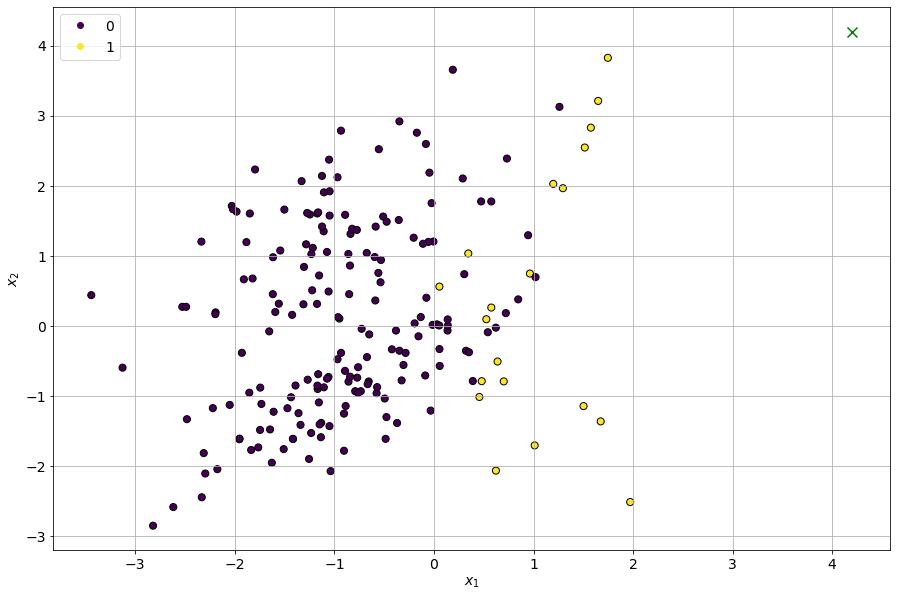

In [55]:
X_data, y_data = make_classification(
    n_samples=200,
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    n_clusters_per_class=2,
    random_state=RANDOM_STATE,
    weights=[0.9, 0.1]
)

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k', )
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', s=100, edgecolor='k', c='green')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [56]:
y_data[y_data == 0].shape, y_data[y_data == 1].shape

((180,), (20,))

In [57]:
# TODO - разберите вместе с преподавателем
def get_kfold_splits_stratified(y, kfolds):
    ''' Функция получения индексов для разделения на K фолдов
            со стратификацией по y
    
    Параметры
    ---------
    y: [n_samples]
        Вектор целевых классов, по которому будет производиться стратификация
    k: int
        Количество фолдов
    
    Возвращает
    ----------
    Список, в котором находится k пар (кортежей)
        Каждая пара представляет собой два массива:
        - массив индексов обучающей выборки
        - массив индексов тестовой выборки
    '''
    folds_indexes = []
    n_samples = len(y)
    step = n_samples/kfolds

    classes_indices = {}
    unique_classes = np.unique(y)
    for k in unique_classes:
        class_indices = np.where(y==k)[0]
        class_indices = np.random.permutation(class_indices)
        classes_indices[k] = class_indices

    for i in range(kfolds):
        test_indexes = []
        train_indexes = []

        for k in unique_classes:
            class_indices = classes_indices[k]
            step = len(class_indices)/kfolds

            start_idx = int(i*step)
            end_idx = int((i+1)*step)          

            mask = np.zeros_like(class_indices, dtype=bool)
            mask[start_idx:end_idx] = True

            test_indexes.extend(class_indices[mask])
            train_indexes.extend(class_indices[~mask])
        
        train_indexes = np.random.permutation(train_indexes)
        test_indexes = np.random.permutation(test_indexes)

        folds_indexes.append(
            (train_indexes, test_indexes)
        )

    return folds_indexes

In [58]:
# Проверка
folds = get_kfold_splits_stratified(y_data, K_FOLDS)

fold = folds[2]
test_indexes = fold[1]

assert  (y_data[test_indexes] == 1).sum() == 4

In [59]:
# TODO - напишите реализацию обучения со стратификацией CV
K_FOLDS = 5
f1_scores = []

for train_indexes, test_indexes in get_kfold_splits_stratified(y_data, K_FOLDS):
   
    # По индексам фолдов получите 
    #   {X,y}_{train,test} из данных X_data
    X_train=X_data[train_indexes]
    y_train=y_data[train_indexes]
    X_test=X_data[test_indexes]
    y_test=y_data[test_indexes]

    # Произведите обучение модели, оцените на тестовом фолде
    #   и получите среднее значение f1 по всем классам, 
    #   добавьте значение в массив f1_scores
    trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train
    )
    y_pred=predict(X_test, trained_W, 0.5)
    recall_1, precision_1, f1_1=calculate_recall_precision_f1(y_test, y_pred, 1)
    recall_0, precision_0, f1_0=calculate_recall_precision_f1(y_test, y_pred, 0)
    f1_result=(f1_1+f1_0)/2
    f1_scores.append(f1_result)
# Получите среднее значение по массиву f1_scores

print(f' metric f1: {np.mean(f1_scores)}')


Result weights: [-2.67384663  4.23551026 -0.82107847]
Result weights: [-3.38307304  5.01877716 -1.02570039]
Result weights: [-2.78530217  4.23959124 -0.93338763]
Result weights: [-2.88039502  4.1693522  -0.50054236]
Result weights: [-2.9990539   5.0887128  -0.99002785]
 metric f1: 0.8544358644358645


In [60]:
# TODO - напишите реализацию метода oversample
def oversample_by_class(X, y, oversample_class, target_count):
    # разделим данные, а именно выделим данные класса oversample_class
    index=np.arange(len(y))
    data_true=index[y==oversample_class]
    # повторение записей класса oversample_class
    data_repeat=np.random.choice(data_true,target_count-len(data_true))
    # создание новых массивов c повторяющимися данными в соответсвии с массивом data_repeat
    X_new=X[data_repeat,:]
    y_new=y[data_repeat]
    # Объединение исходных и расширенных данных классов
    X=np.concatenate((X,X_new),axis=0)
    y=np.concatenate((y,y_new),axis=0)
    return X, y

In [61]:
# Проверка
X_check, y_check = oversample_by_class(X_data, y_data, 1, 200)

assert (y_check==1).sum() == 200

In [62]:
class0_count = (y_data==0).sum()
X_new_data, y_new_data = oversample_by_class(X_data, y_data, 1, class0_count)

K_FOLDS = 5
f1_scores = []
# TODO - напишите процесс обучения

for train_indexes, test_indexes in get_kfold_splits_stratified(y_new_data, K_FOLDS):
   
    # По индексам фолдов получите 
    #   {X,y}_{train,test} из данных X_data
    X_train=X_new_data[train_indexes]
    y_train=y_new_data[train_indexes]
    X_test=X_new_data[test_indexes]
    y_test=y_new_data[test_indexes]

    # Произведите обучение модели, оцените на тестовом фолде
    #   и получите среднее значение f1 по всем классам, 
    #   добавьте значение в массив f1_scores
    trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train
    )
    y_pred=predict(X_test, trained_W, 0.5)
    recall_1, precision_1, f1_1=calculate_recall_precision_f1(y_test, y_pred, 1)
    recall_0, precision_0, f1_0=calculate_recall_precision_f1(y_test, y_pred, 0)
    f1_result=(f1_1+f1_0)/2
    f1_scores.append(f1_result)
# Получите среднее значение по массиву f1_scores

print(f' metric f1: {np.mean(f1_scores)}')

Result weights: [-0.78736058  4.7277029  -0.63890217]
Result weights: [-0.48764781  4.41043548 -0.69763768]
Result weights: [-0.6899011   4.83087906 -0.47383865]
Result weights: [-0.70902545  4.72582486 -0.74468396]
Result weights: [-0.97208626  4.86128428 -0.68191707]
 metric f1: 0.913545799532591


In [63]:
# TODO - напишите реализацию метода undersample
def undersample_by_class(X, y, undersample_class, target_count):
     # разделим данные, а именно выделим данные класса oversample_class
    index=np.arange(len(y))
    data_1=index[y==undersample_class]
    data_2=index[~(y==undersample_class)]
    new_data_1=np.random.choice(data_1,target_count)
    new_data=np.concatenate((new_data_1,data_2),axis=0)
    X=X[new_data,:]
    y=y[new_data]
    
    return X, y

In [64]:
# Проверка

X_check, y_check = undersample_by_class(X_data, y_data, 0, 20)

assert (y_check==0).sum() == 20


In [65]:
class1_count=(y_data==1).sum()
X_new_data, y_new_data=undersample_by_class(X_data, y_data, 0, class1_count)

# TODO - напишите процесс обучения и оценки
K_FOLDS=5
f1_scores=[]

for train_indexes, test_indexes in get_kfold_splits_stratified(y_new_data, K_FOLDS):
   
    # По индексам фолдов получите 
    #   {X,y}_{train,test} из данных X_data
    X_train=X_new_data[train_indexes]
    y_train=y_new_data[train_indexes]
    X_test=X_new_data[test_indexes]
    y_test=y_new_data[test_indexes]

    # Произведите обучение модели, оцените на тестовом фолде
    #   и получите среднее значение f1 по всем классам, 
    #   добавьте значение в массив f1_scores
    trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train
    )
    y_pred=predict(X_test, trained_W, 0.5)
    recall_1, precision_1, f1_1=calculate_recall_precision_f1(y_test, y_pred, 1)
    recall_0, precision_0, f1_0=calculate_recall_precision_f1(y_test, y_pred, 0)
    f1_result=(f1_1+f1_0)/2
    f1_scores.append(f1_result)
# Получите среднее значение по массиву f1_scores

print(f' metric f1: {np.mean(f1_scores)}')

Result weights: [-0.49626787  7.19942166 -0.42452785]
Result weights: [ 1.75352356  7.29112828 -1.76866373]
Result weights: [-1.26374612  7.98211821 -0.55200362]
Result weights: [-0.47759937  7.06268419 -0.40942072]
Result weights: [-0.54233376  6.71898386  0.00745045]
 metric f1: 0.9212698412698412


# Выводы - Задание

**1. Чем отличается задача классификации от задачи регрессии?**

В задаче регрессии результатом предсказания модели является повторение зависимости y(x), которая отражает характер данных. В задаче классификации предсказанием модели является значение из фиксированного набора уникальных значений, т.е. определение класса по известным характеристикам.

**2. Зачем нужны метрики? Что хорошего можно от них получить?**

В задачах машинного обучения для оценки качества моделей и сравнения различных алгоритмов используются метрики.
К примеру, метрика accuracy определяет долю правильных ответов алгоритма. Точность - метрика оценки конкретного класса, чувствительна к промахам присвоения оцениваемого класса другим записям. Полнота - метрика оценки конкретного класса. F-мера - гармоническое среднее двух показателей.

**3. Зачем разделять данные на тестовую выборку и выборку для обучения? Может лучше использовать все данные совместно?**

Обучающая выборка (training) — выборка, по которой производится настройка (оптимизация параметров) модели зависимости.
Тестовая (или контрольная) выборка (test) — выборка, по которой оценивается качество построенной модели. Если обучающая и тестовая выборки независимы, то оценка, сделанная по тестовой выборке, является несмещённой.
Это нобходимо, чтобы проверять построенную модель на данных, которые не фигурировали в обучении для чистоты проверки.

**4. А если в данных дисбаланс? Как учить то модель?**

Если в данных есть дисбаланс, то можно пойти трумея путями: во первых, просто добавить новых данных, во вторых искуственно увеличить тот класс, записей данных корторого меньше всего (путем повтора данных), а третий - искуственное уменьшение записей  того класса, который превалирует над остальными.


# Вопросы

**1. Может ли количество классов быть неизвестным при задаче классификации?**

Нет, не может. Ведь особенностью классической задачи классификации является наличие фиксированного числа предсказываемых классов

**2. Зачем нужна сигмоида? Куда её применять?**

Сигмоида (или логистическая регрессия) используется для конечного предсказания модели. Она позволяет определить принадлежность классу.

**3. Слабо назвать 4 базовые метрики без запинки?**

Accuracy, Precision, Recall, F1

**4. Какую метрику нужно использовать, чтобы оценить общую работу классификатора?**

 для общей оценки классификатора используется метрика Accuracy. Но для глубокого анализа не подходит.
 
 **5. Какие метрики дают оценку какого-то конкретного класса?**
 
 Для оценки конкретного класса используются метрикии Precision, Recall.
 
 **6. Что такое стратификация и причём тут сплит?**
 
 Вообще, в питон команда split - разделяет данные на отдельные части и вот эти самые части и называются сплитами. Стратификация классов в задачах классификации означает, что каждый класс делится между обучением и тестированием в определенной пропорции, при этом сохраняя соотношение классов (это важно).
 
 **7. Почему для задачи классификации есть своя собственная функция потерь?**
 
В случае задачи линейной регрессии формируется невыпуклая (non-convex) плоскость ошибки, по которой градиентный спуск (или другой метод оптимизации) пытается найти оптимум. Поэтому в задачах классификации вводится собственная функция потерь.

**8. Как лучше разделить данные на тест и обучение, если самих данных мало?**

При малом объеме данных можно применить к-фолд кросс-валидацию (позволяет произвести усредненную оценку на всем объеме данных).

**9. Работает ли в машином обучении подход "у кого больше данных - тот король вечеринки"?**

Не всегда. Если вдруг, к примеру, будет дисбаланс классов, то это наоборот сыграет злую шутку и предсказания будут уже неверные. Поэтому много - не значит хорошо.